<div style="background-color: lightgreen; padding: 10px;">
    <h2> Projeto | Machine Learning II - Ensemble e Clustering
</div>

### Aluno:
André R. Kuster | nº: 1116029

### Objetivo:

Este projeto visa aplicar os conceitos aprendidos na disciplina de **Machine Learning 2** em um contexto prático, utilizando um conjunto de dados contendo o nível de satisfação dos passageiros de uma companhia aérea. O objetivo principal é identificar quais fatores estão altamente correlacionados com a satisfação (ou insatisfação) dos passageiros e construir um modelo capaz de predizer o nível de satisfação com base nos dados.

### Base de Dados:

A base de dados contém informações detalhadas das respostas dos passageiros sobre sua experiência com a companhia aérea. As variáveis explicativas incluem gênero, idade, tipo de viagem, classe, distância do voo e níveis de satisfação em diversos aspectos como serviço facilidade de reserva online, localização do portão, comida e bebida, embarque online, conforto do assento, etc. A variável dependente é o nível de satisfação do passageiro, que pode se apresentar em duas classes: satisfeito (1); neutro ou insatisfeito (0).

### Motivação:

A motivação para este estudo é entender melhor os fatores que contribuem para a satisfação dos passageiros e como esses insights podem ser utilizados para melhorar a **experiência do cliente** nas companhias aéreas. Além disso, aplicar técnicas avançadas de machine learning e clusterização oferece uma oportunidade de desenvolver habilidades práticas em *análise de dados e modelagem preditiva*.

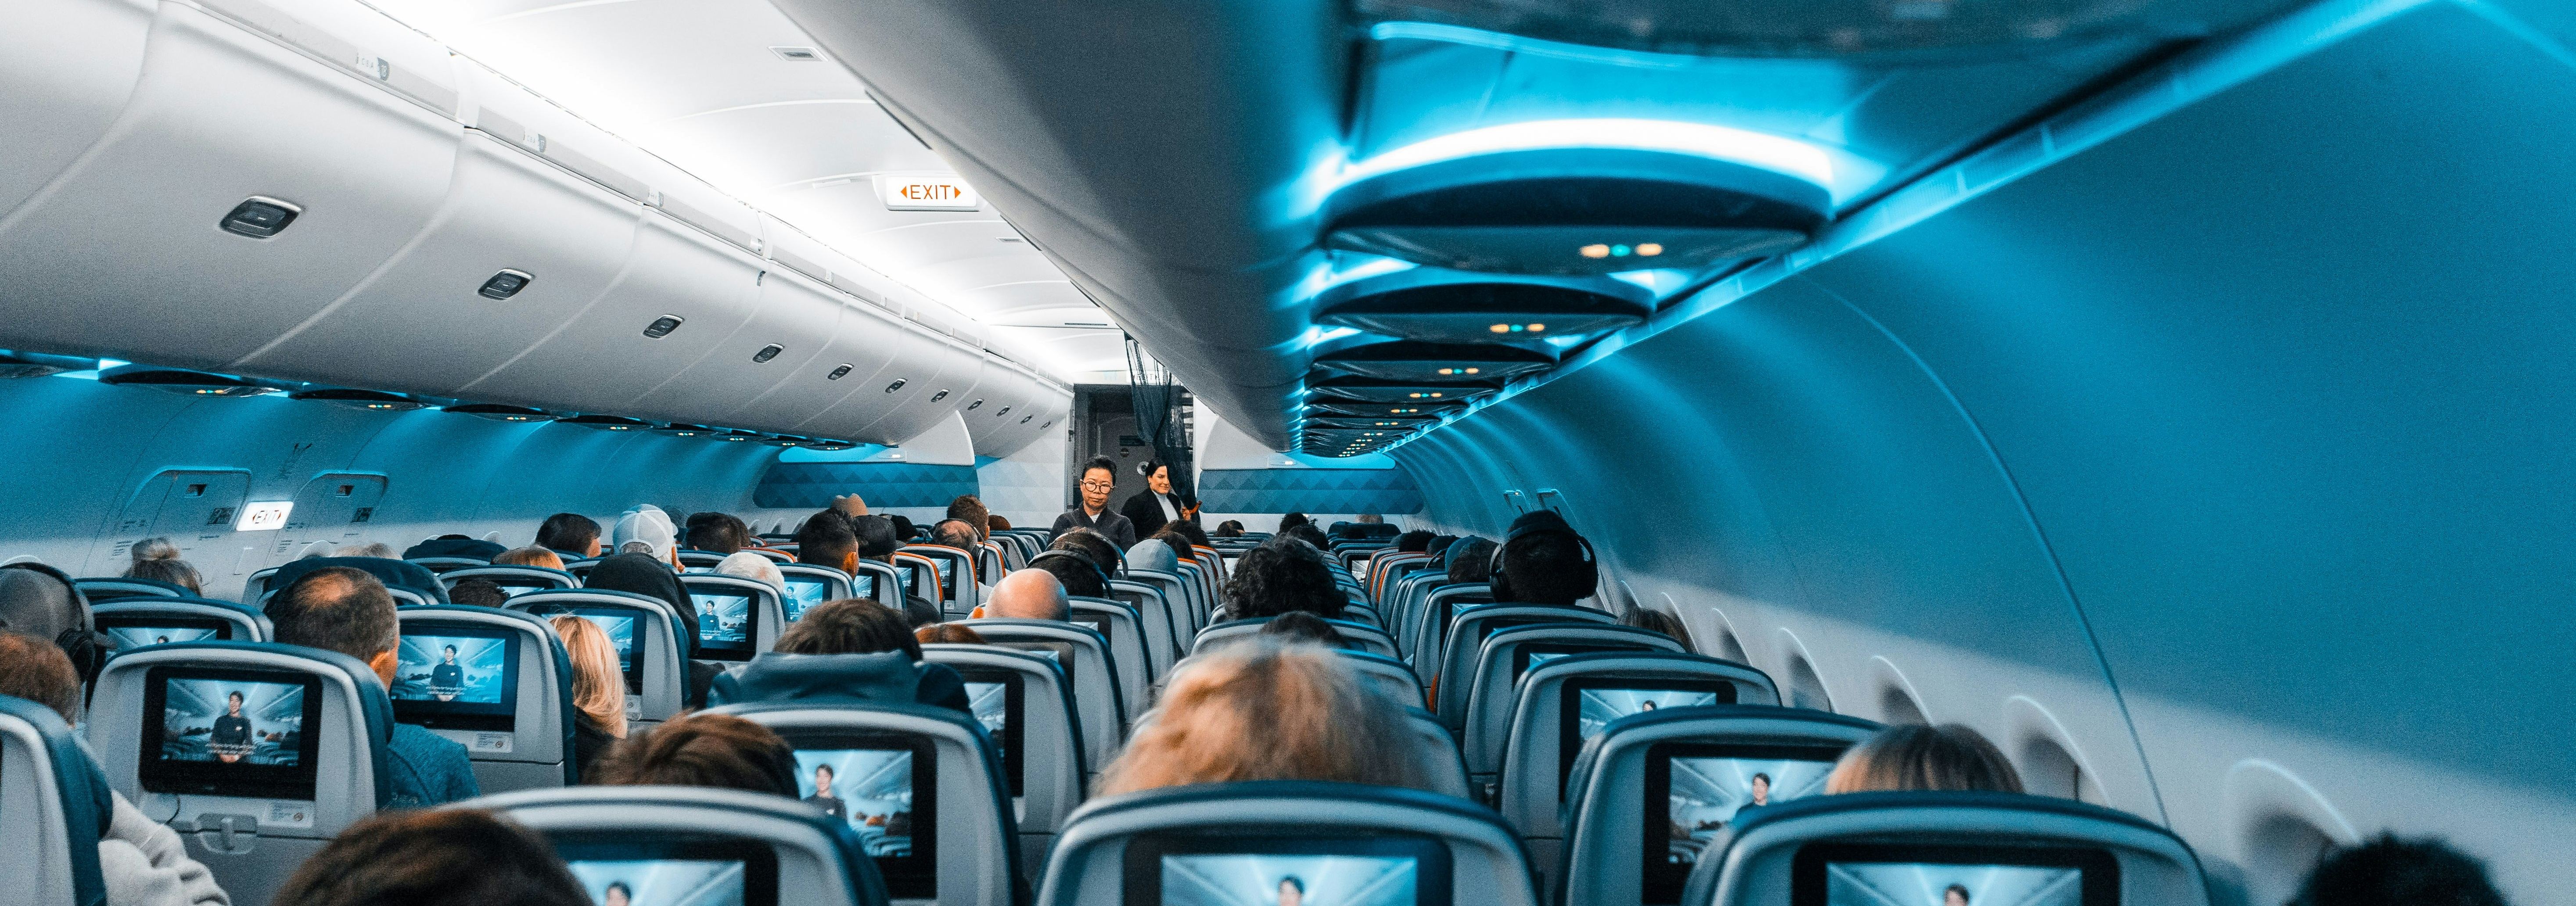
Foto de <a href="https://unsplash.com/pt-br/@omarprestwich?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Omar Prestwich</a> na <a href="https://unsplash.com/pt-br/fotografias/pessoas-no-aviao-durante-o-dia-FCM4k7LcggU?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>
  

### Ferramentas:
Pandas, Matplotlib, Seaborn, Scikit-learn

### Referências:
- https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data?select=train.csv
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- https://www.kaggle.com/code/melihkanbay/knn-best-parameters-gridsearchcv
- https://seaborn.pydata.org/tutorial/color_palettes.html

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Importação das bibliotecas
</div>

Inicialmente iremos importar o ``NumPy``, ``Pandas``, utilizando respectivamente os alias ``np``, ``pd``.

Colocaremos também à disposição bibliotecas para a construção de visuais gráficos, como o ``Seaborn`` e o ``Matplotlib``.

Por fim a biblioteca ``sklearn`` nos auxiliará com todo aparato dos modelos de machine learning, desde o pré-processamento até a validação final.

In [41]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math

import random

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay 
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Base de dados
</div>


A base de dados escolhida no site **Kaggle Datasets** consiste em informações sobre a satisfação dos passageiros de uma companhia aérea.

A base contém ``variáveis explicativas`` (*features*) sobre as características dos passageiros e sua experiência de voo, incluindo gênero, tipo de cliente (fiel ou não), idade, tipo de viagem (pessoal ou negócios), classe de viagem (Econômica, Econômica Plus, ou Executiva), distância do voo, e níveis de satisfação em vários aspectos como serviço de Wi-Fi a bordo, conveniência do horário de partida/chegada, facilidade de reserva onleza, além de atrasos na partida e chegada.

Por se tratar de um problema de classificação, a ``variável dependente`` (*target*) consiste na **satisfação do passageiro**, que pode ser categorizada como satisfeito, neutro ou insatisfeito.

A justificatia escolha dessa base foi colha é a relevância deste não só na unto na indústria da, mas também no contexto de empresas que oferecem serviços para seus clientes finais aSendo assim, ciação. Compreender os fatores que influenciam a satisfação dos passageiros permite às companhias aéreas melhorar a experiência do cliente, otimizar os serviços oferecidos, reduzir reclamações e aumentar a fidelidade dos clientes, o que é crucial para manter uma base de clientes leal e melhorar a reputação da empresa.

---
Abaixo, temos um quadro com a documentação e descrição de cada uma das variáveis da base:

| Nome da Variável                | Tipo   | Descrição                                                                                   |
|---------------------------------|--------|---------------------------------------------------------------------------------------------|
| Gender                          | Categórica | Gênero dos passageiros (Feminino, Masculino)                                                  |
| Customer Type                   | Categórica | Tipo de cliente (Cliente fiel, Cliente não fiel)                                              |
| Age                             | Numérica | Idade dos passageiros                                                                         |
| Type of Travel                  | Categórica | Propósito da viagem dos passageiros (Viagem pessoal, Viagem de negócios)                      |
| Class                           | Categórica | Classe de viagem no avião (Executiva, Econômica, Econômica Plus)                              |
| Flight Distance                 | Numérica | Distância do voo em milhas                                                                    |
| Inflight wifi service           | Numérica | Nível de satisfação com o serviço de Wi-Fi a bordo (0: Não aplicável; 1-5)                    |
| Departure/Arrival time convenient| Numérica | Nível de satisfação com a conveniência do horário de partida/chegada (1-5)                    |
| Ease of Online booking          | Numérica | Nível de satisfação com a facilidade de reserva online (1-5)                                  |
| Gate location                   | Numérica | Nível de satisfação com a localização do portão (1-5)                                         |
| Food and drink                  | Numérica | Nível de satisfação com a comida e bebida a bordo (1-5)                                       |
| Online boarding                 | Numérica | Nível de satisfação com o embarque online (1-5)                                               |
| Seat comfort                    | Numérica | Nível de satisfação com o conforto do assento (1-5)                                           |
| Inflight entertainment          | Numérica | Nível de satisfação com o entretenimento a bordo (1-5)                                        |
| On-board service                | Numérica | Nível de satisfação com o serviço a bordo (1-5)                                               |
| Leg room service                | Numérica | Nível de satisfação com o espaço para as pernas (1-5)                                         |
| Baggage handling                | Numérica | Nível de satisfação com o manuseio de bagagem (1-5)                                           |
| Check-in service                | Numérica | Nível de satisfação com o serviço de check-in (1-5)                                           |
| Inflight service                | Numérica | Nível de satisfação com o serviço a bordo (1-5)                                               |
| Cleanliness                     | Numérica | Nível de satisfação com a limpeza (1-5)                                                       |
| Departure Delay in Minutes      | Numérica | Minutos de atraso na partida                                                                  |
| Arrival Delay in Minutes        | Numérica | Minutos de atraso na chegada                                                                  |
| Satisfaction                    | Categórica | Nível de satisfação do passageiro (Satisfeito, Neutro, Insatisfeito)                          |


<div style="background-color: lightgray; padding: 10px;">
    <h2> Importando a base de dados
</div>

No referido site estão disponíveis dois conjuntos de dados: ``train.csv`` e ``test.csv``.

Os dois conjuntos são do mesmo lote, mas foram divididos em uma proporção de 80/20. Vamos utilizar portanto o conjunto maior (ou seja, **train.csv**) para fins de treinamento e teste, onde avaliaremos o desempenho do modelo.

In [2]:
# Carregamento dos dados:
df = pd.read_csv('train.csv',engine='python', sep=',')

# Definindo uma configuração para exibir todas as colunas:
pd.set_option('display.max_columns', None)
df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               5                3             5                       5   
1               1                3             1                       1   
2               5                5             5                       5   
3               2                2             2                       2   
4               4                5             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied

In [3]:
df.shape

(103904, 25)

**Conclusão:** *Nota-se que temos disponíveis 103904 observações, 25 variáveis, incluindo id's, features e target, que selecionaremos nas seções adiante.*

<div style="background-color: lightgreen; padding: 10px;">
    <h2> EDA - Análise exploratória dos dados
</div>

Antes de aplicar os algoritmos de machine learning, realizaremos uma análise exploratória dos dados (EDA) para entender melhor a distribuição das variáveis, identificar outliers e explorar possíveis correlações entre as variáveis e a satisfação dos passageiros.

In [4]:
# Para sermos mais objetivos, vamos remover as duas colunas unnamed e id que não irão agregar em nossa análise:
df = df.drop(['Unnamed: 0','id'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

---
**Nota:** Identificamos 5 variáveis categóricas e 18 numéricas. Portanto vamos prosseguir com a análise de cada uma delas:

In [6]:
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
df[categorical_columns].describe()  

Gender   Customer Type   Type of Travel     Class
count   103904          103904           103904    103904
unique       2               2                2         3
top     Female  Loyal Customer  Business travel  Business
freq     52727           84923            71655     49665

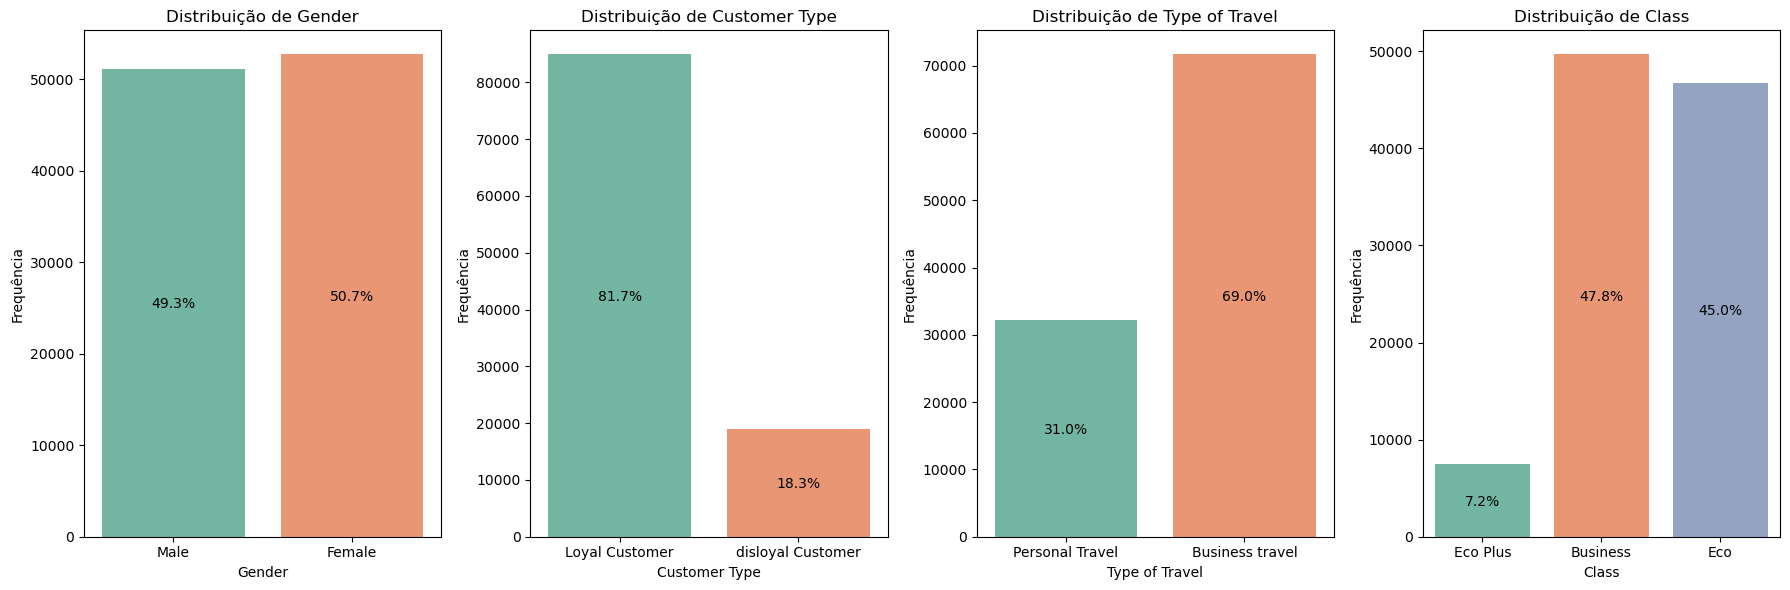

In [7]:
# Construindo uma função para análise univariada das variáveis categóricas:
def plot_univariate_categorical(df, columns):
    fig, axes = plt.subplots(1, len(columns), figsize=(18, 6))

    for ax, column in zip(axes, columns):
        countplot = sns.countplot(x=column, data=df, palette='Set2', ax=ax)
        ax.set_title(f'Distribuição de {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequência')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

        # Adicionar as porcentagens nas barras
        for p in countplot.patches:
            percentage = f'{100 * p.get_height() / len(df):.1f}%'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height() / 2
            ax.annotate(percentage, (x, y), ha='center', va='center_baseline', c='black')

    plt.tight_layout()
    plt.show()

plot_univariate_categorical(df, categorical_columns)

**Conclusão:** *Percebemos um balanceamento nas respostas por gênero, com uma pequena vantagem na quantidade de mulheres. Com relação ao tipo de cliente, a maioria são "Loyal Customer" (81.7%) e pode ser que isso tenha um peso na nota de satisfação, mais adiante vamos poder atestar.*

*69% das viagens são a negócios, enquanto 31% são por motivos pessoais. E com relação à classe escolhida, as classes preponderantes são a Business e a Eco, com 48% e 45% respectivamente, a minoria são da classe Eco Plus (7%).*

---
Agora vamos dar seguimento na análise das variáveis numéricas:

In [8]:
df.select_dtypes(include = np.number).columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [9]:
df.describe()  

Age  Flight Distance  Inflight wifi service  \
count  103904.000000    103904.000000          103904.000000   
mean       39.379706      1189.448375               2.729683   
std        15.114964       997.147281               1.327829   
min         7.000000        31.000000               0.000000   
25%        27.000000       414.000000               2.000000   
50%        40.000000       843.000000               3.000000   
75%        51.000000      1743.000000               4.000000   
max        85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      103904.000000           103904.000000   
mean                            3.060296                2.756901   
std                             1.525075                1.398929   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding   Seat comfort  \
count  103904.000000   103904.000000    103904.000000  103904.000000   
mean        2.976883        3.202129         3.250375       3.439396   
std         1.277621        1.329533         1.349509       1.319088   
min         0.000000        0.000000         0.000000       0.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         3.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count           103904.000000     103904.000000     103904.000000   
mean                 3.358158          3.382363          3.351055   
std                  1.332991          1.288354          1.315605   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service    Cleanliness  \
count     103904.000000    103904.000000     103904.000000  103904.000000   
mean           3.631833         3.304290          3.640428       3.286351   
std            1.180903         1.265396          1.175663       1.312273   
min            1.000000         0.000000          0.000000       0.000000   
25%            3.000000         3.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count               103904.000000             103594.000000  
mean                    14.815618                 15.178678  
std                     38.230901                 38.698682  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                     12.000000                 13.000000  
max                   1592.000000               1584.000000

In [10]:
df.median(numeric_only = True)

Age                                   40.0
Flight Distance                      843.0
Inflight wifi service                  3.0
Departure/Arrival time convenient      3.0
Ease of Online booking                 3.0
Gate location                          3.0
Food and drink                         3.0
Online boarding                        3.0
Seat comfort                           4.0
Inflight entertainment                 4.0
On-board service                       4.0
Leg room service                       4.0
Baggage handling                       4.0
Checkin service                        3.0
Inflight service                       4.0
Cleanliness                            3.0
Departure Delay in Minutes             0.0
Arrival Delay in Minutes               0.0
dtype: float64

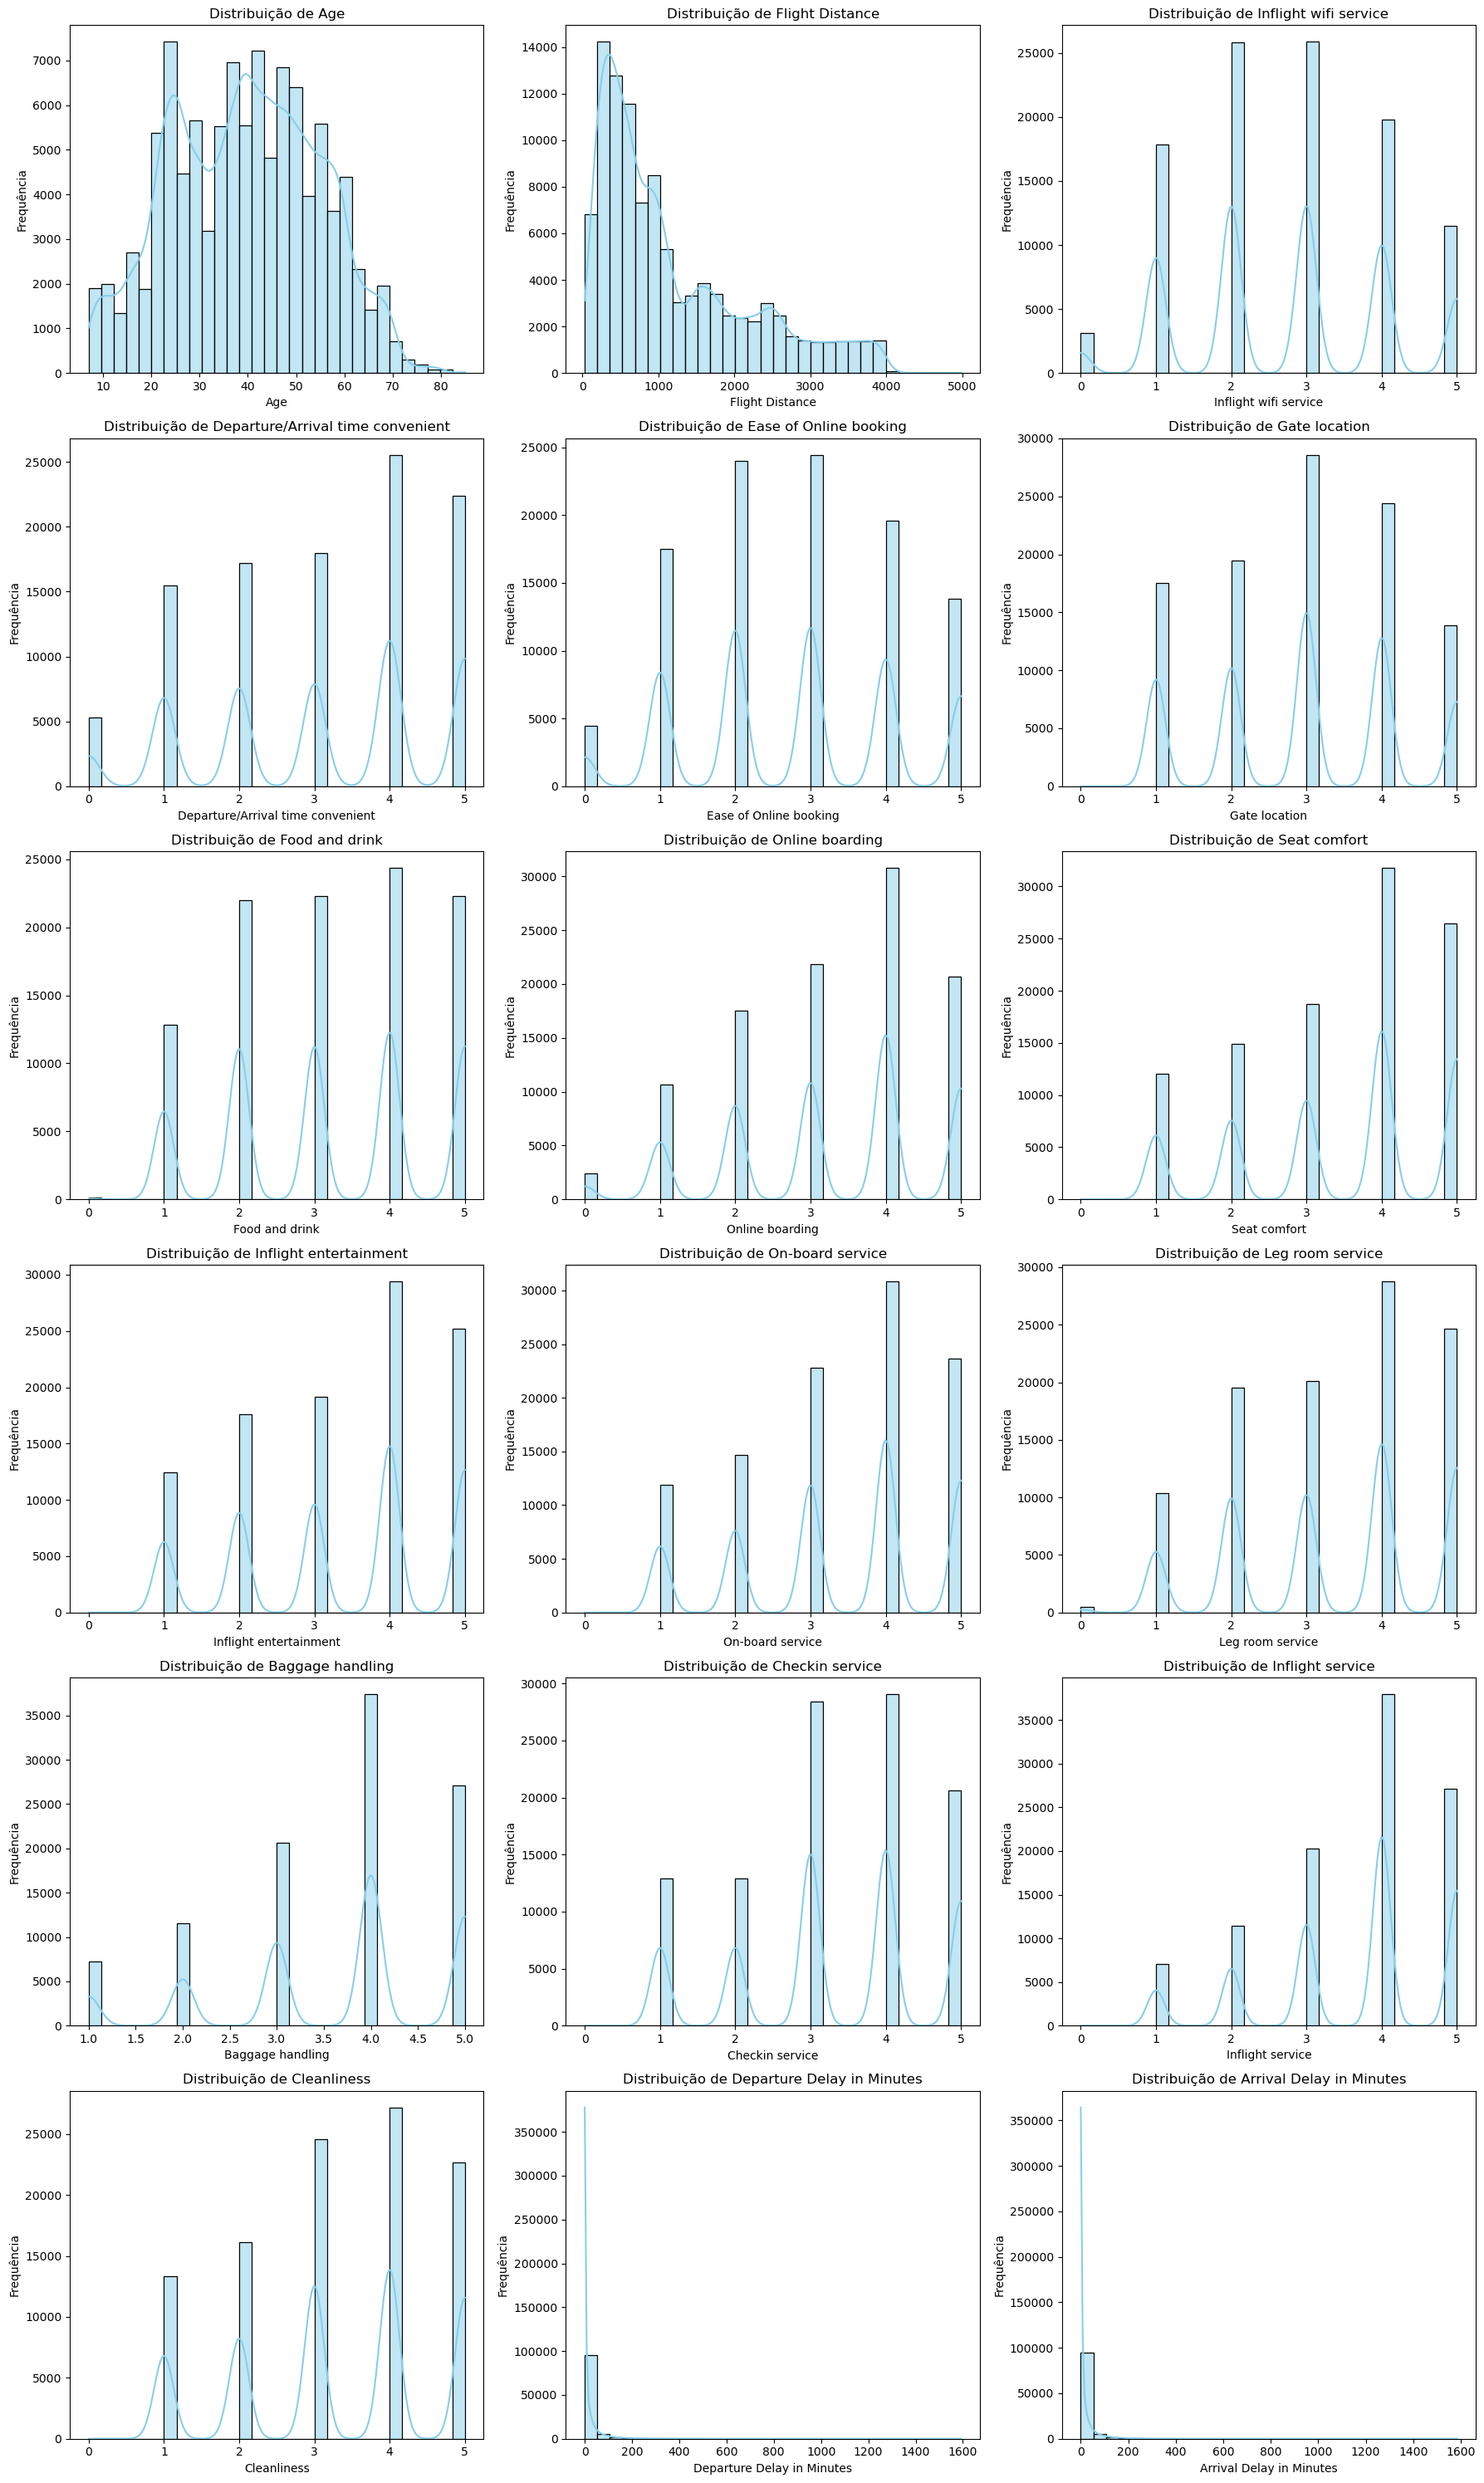

In [11]:
# Construindo uma função para análise univariada das variáveis numéricas:
def plot_univariate_numerical(df):

    numerical_columns = df.select_dtypes(include=np.number).columns
    
    # Tamanho da grade de gráficos:
    num_columns = len(numerical_columns)
    num_rows = math.ceil(num_columns / 3)
    
    # Definir o tamanho da figura e a quantidade de subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))
    
    # Achatar a matriz de eixos para iterar facilmente
    axes = axes.flatten()
    
    for ax, column in zip(axes, numerical_columns):
        sns.histplot(df[column], bins=30, kde=True, ax=ax, color='skyblue')
        ax.set_title(f'Distribuição de {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequência')
    
    # Remover eixos não utilizados
    for ax in axes[len(numerical_columns):]:
        ax.remove()
    
    # Ajustar o layout para que os subplots não se sobreponham
    plt.tight_layout()
    plt.show()

# Chamar a função para plotar histogramas
plot_univariate_numerical(df)

**Conclusão:** <br> 
*São muitas variáveis a analisar, mas podemos destacar aqui algumas que apresentaram maior relevância:*
- *A média de idade é de 39,3 anos, e podemos perceber uma grande amplitude (entre 7 e 85 anos) e variabilidade (desvio padrão 15.1).*
- *A maioria dos vôos são de distâncias curtas. 50% da amostra possui distância menor do que 843 milhas.*
- *Serviço de Wifi, Horário de Partida/Chegada, Facilidade de reserva no site, Localização do Portão são variáveis que se destacaram pela presença de notas de satisfação abaixo do máximo, com médias inferiores a 3. O que pode envidenciar características que afetem a satisfação dos clientes.*

<div style="background-color: lightgray; padding: 10px;">
    <h2> Análise da Satisfação dos Clientes
</div>

Uma vez que conhecemos todas as nossas features disponíveis, vamos avançar para o entendimento da nossa variável target, o nível de satisfação.

Faremos uma analise univariada e também vamos avaliar a satisfação de forma cruzada com as features.

In [12]:
df['satisfaction'].value_counts(normalize=True)

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64

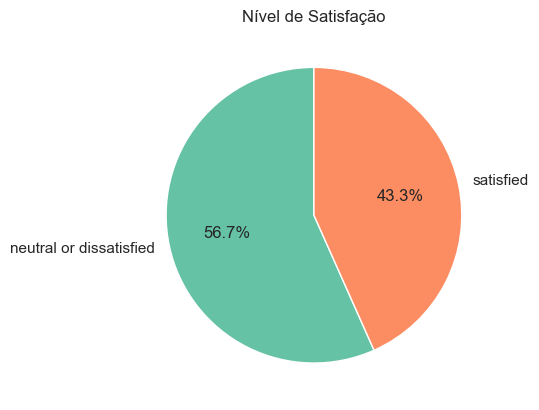

In [13]:
sns.set(style="white")
plt.title('Nível de Satisfação')
plt.pie(df['satisfaction'].value_counts(), labels=df['satisfaction'].unique(), autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.show()

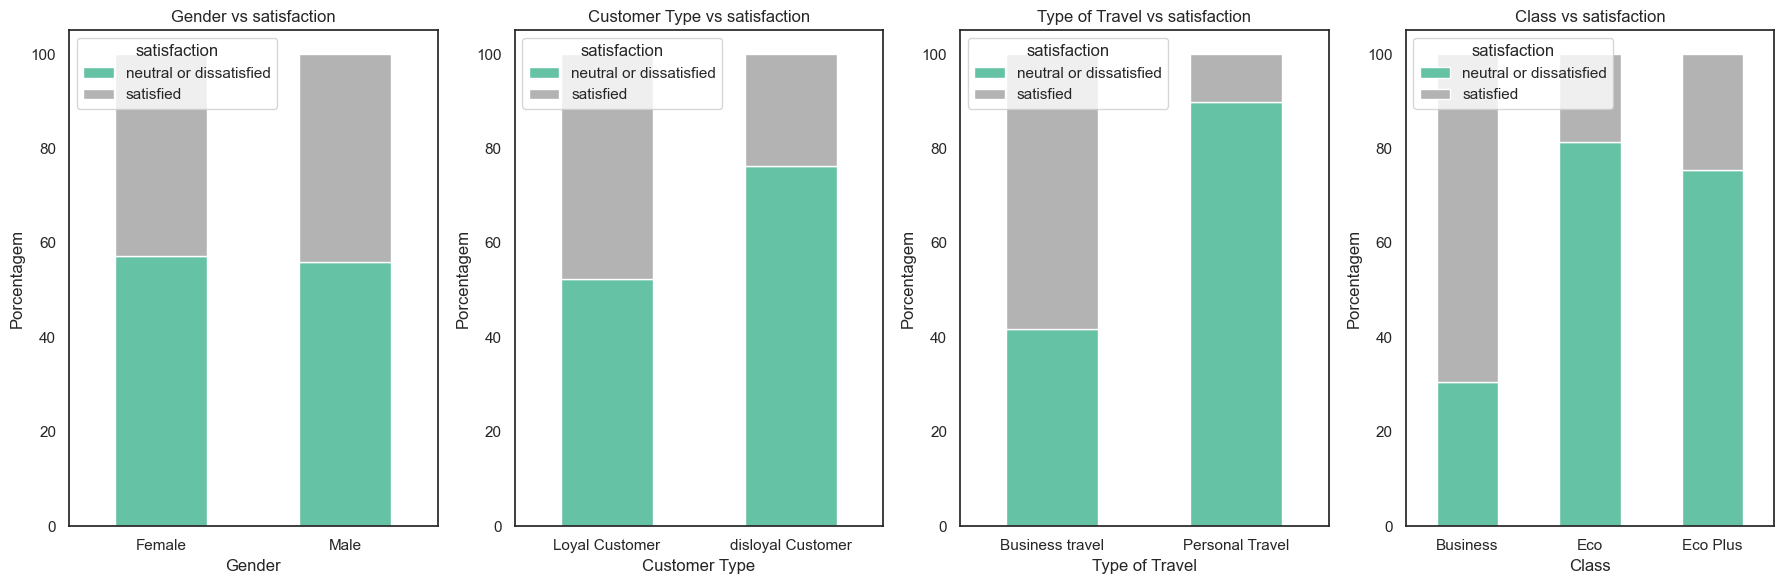

In [14]:
# Função para plotar gráficos de barras empilhadas para variáveis categóricas em conjunto com a variável alvo
def plot_categorical_with_target(df, target, columns):
    num_columns = len(columns)
    num_rows = math.ceil(num_columns / 4)
    
    # Definir o tamanho da figura e a quantidade de subplots
    fig, axes = plt.subplots(num_rows, 4, figsize=(18, 6 * num_rows))
    axes = axes.flatten()
    
    # Iterar sobre as colunas e os eixos dos subplots
    for ax, column in zip(axes, columns):
        # Criar uma tabela cruzada para contar as ocorrências
        cross_tab = pd.crosstab(df[column], df[target], normalize='index') * 100
        
        # Plotar a tabela cruzada como gráfico de barras empilhadas
        cross_tab.plot(kind='bar', stacked=True, ax=ax, colormap='Set2')
        
        # Configurar título e rótulos
        ax.set_title(f'{column} vs {target}')
        ax.set_xlabel(column)
        ax.set_ylabel('Porcentagem')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
        ax.legend(title=target, loc='upper left')
    
    # Remover eixos não utilizados
    for ax in axes[len(columns):]:
        ax.remove()
    
    # Ajustar o layout para que os subplots não se sobreponham
    plt.tight_layout()
    plt.show()

# Chamar a função para plotar gráficos
plot_categorical_with_target(df, 'satisfaction', categorical_columns)

**Conclusão:** <br> 
*Conseguimos identificar que algumas variáveis apresentam níveis de satisfação bem diferentes:*
- *Passageiros 'Loyal' apresentam índices de satisfação maiores do que os 'Disloyal';*
- *Aqueles que viagem a negócios tendem a estar mais satisfeitos do que os que viajam por motivos pessoais;*
- *Quanto à Classe, passageiros das classes Eco e EcoPlus apresentam altos níveis de insatisfação.*

*É importante mencionar que a variável Gênero apresentou níveis bem semelhantes*.

---
Agora uma análise cruzada com as variáveis numéricas.

Vamos observar o comportamento da ``média`` de cada variável para cada nível de satisfação e também analisar gráficos da ``distribuição`` em cada nível:

In [27]:
df.groupby('satisfaction').mean()

C:\Users\Andre\AppData\Local\Temp\ipykernel_8832\251643042.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('satisfaction').mean()


Age  Flight Distance  Inflight wifi service  \
satisfaction                                                                 
neutral or dissatisfied  37.566688       928.919971               2.399633   
satisfied                41.750583      1530.140255               3.161288   

                         Departure/Arrival time convenient  \
satisfaction                                                 
neutral or dissatisfied                           3.129112   
satisfied                                         2.970305   

                         Ease of Online booking  Gate location  \
satisfaction                                                     
neutral or dissatisfied                2.546850       2.976121   
satisfied                              3.031582       2.977879   

                         Food and drink  Online boarding  Seat comfort  \
satisfaction                                                             
neutral or dissatisfied         2.95805         2.656125      3.036295   
satisfied                       3.52131         4.027474      3.966530   

                         Inflight entertainment  On-board service  \
satisfaction                                                        
neutral or dissatisfied                2.894156          3.019158   
satisfied                              3.964931          3.857324   

                         Leg room service  Baggage handling  Checkin service  \
satisfaction                                                                   
neutral or dissatisfied          2.990812          3.375991         3.042952   
satisfied                        3.822143          3.966396         3.646041   

                         Inflight service  Cleanliness  \
satisfaction                                             
neutral or dissatisfied          3.388814     2.936123   
satisfied                        3.969461     3.744342   

                         Departure Delay in Minutes  Arrival Delay in Minutes  
satisfaction                                                                   
neutral or dissatisfied                   16.503728                 17.127536  
satisfied                                 12.608084                 12.630799

In [19]:
# Função para plotar gráficos de violino para variáveis numéricas em conjunto com a variável alvo
def plot_numerical_with_target(df, target):
    numerical_columns = df.select_dtypes(include=np.number).columns
    
    # Determinar o tamanho da grade
    num_columns = len(numerical_columns)
    num_rows = math.ceil(num_columns / 3)
    
    # Definir o tamanho da figura e a quantidade de subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))
    
    # Achatar a matriz de eixos para iterar facilmente
    axes = axes.flatten()
    
    # Iterar sobre as colunas e os eixos dos subplots
    for ax, column in zip(axes, numerical_columns):
        sns.violinplot(x=target, y=column, data=df, ax=ax, palette='Set2')
        ax.set_title(f'{column} vs {target}')
        ax.set_xlabel(target)
        ax.set_ylabel(column)
    
    # Remover eixos não utilizados
    for ax in axes[len(numerical_columns):]:
        ax.remove()
    
    # Ajustar o layout para que os subplots não se sobreponham
    plt.tight_layout()
    plt.show()

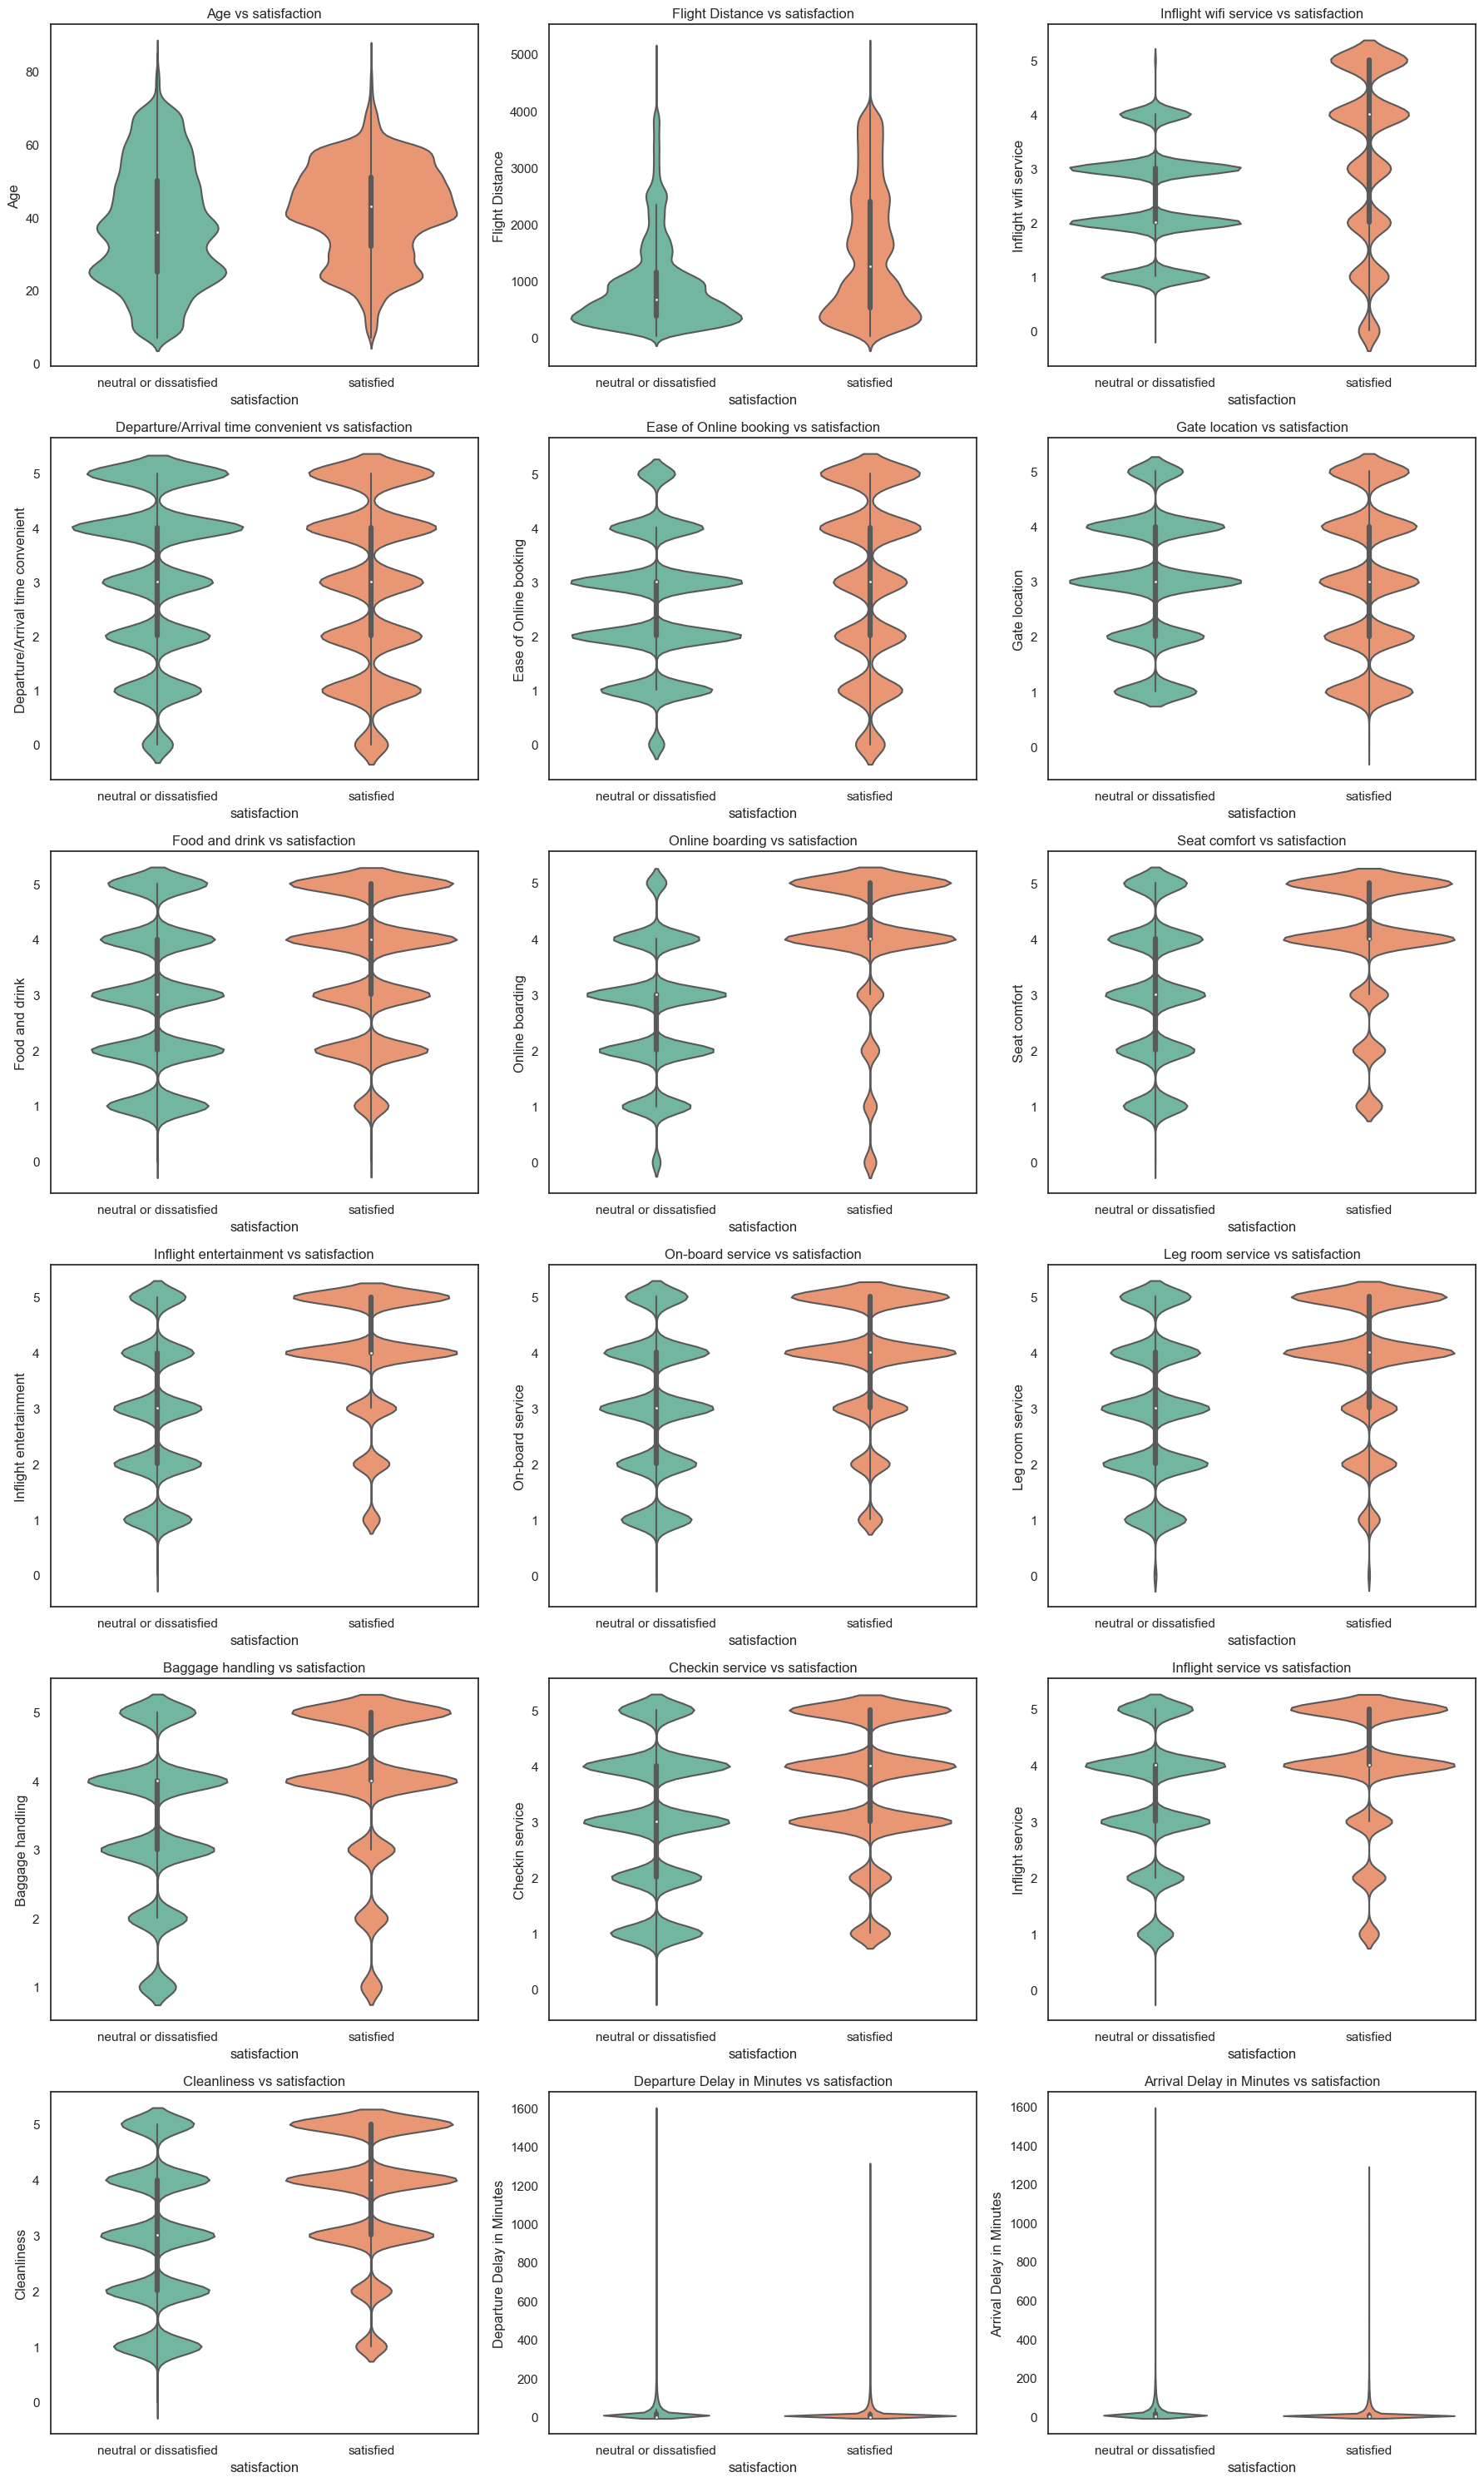

In [21]:
# Chamar a função  plotar gráficos de violino
plot_numerical_with_target(df, 'satisfaction')

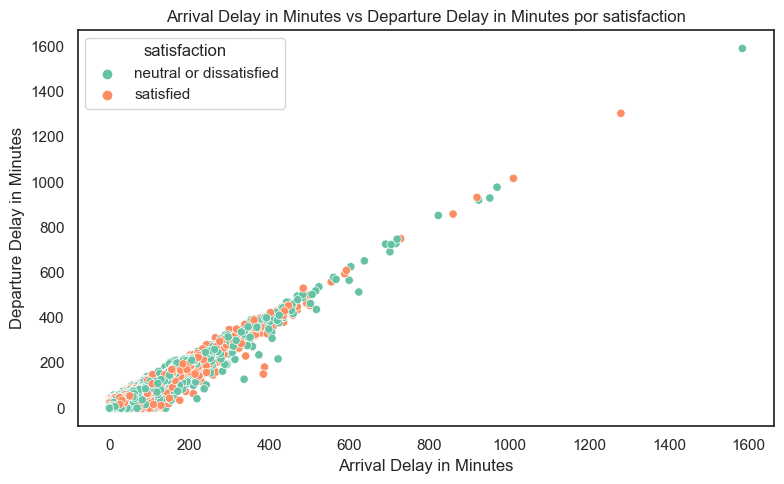

In [107]:
# Função para criar scatter plot das variáveis de atraso de partida e chegada, colorido pelo nível de satisfação
def plot_scatter_with_satisfaction(df, x, y, target):
    plt.figure(figsize=(8, 5))
    scatter_plot = sns.scatterplot(data=df, x=x, y=y, hue=target, palette='Set2')
    
    # Configurar título e rótulos dos eixos
    scatter_plot.set_title(f'{x} vs {y} por {target}')
    scatter_plot.set_xlabel(x)
    scatter_plot.set_ylabel(y)
    
    plt.legend(title=target)
    plt.tight_layout()
    plt.show()

plot_scatter_with_satisfaction(df, 'Arrival Delay in Minutes', 'Departure Delay in Minutes', 'satisfaction')

**Conclusão:** <br> 
*Após a análise do nível de satisfação em cada variável numérica identificamos:*
- *A maioria dos passageiros satisfeitos possuem entre 40 e 60 anos. Enquanto a variabilidade dos insatisfeitos é maior;*
- *Passageiros satisfeitos estão associados a vôos com maiores distâncias;*
- *Foi possível notar comportamentos bem diferentes nas votações das variáveis ``Serviço de Wi-fi``, ``Reserva Online``, ``Conforto dos assentos``;*
- *Por fim, o gráfico de violinos não foi conclusivo para as variáveis de atraso na saída e chegada do vôo, por isso plotamos um scatter plot, onde evidenciamos um certo comportamento linear, onde se um vôo atrasa na partida, provavelmente ele irá atrasar na chegada;*

*Outras variáveis, por sua vez, não aparentam comportamentos distintos, são elas: ``Tempo conveninente de Saída/Chegada``, ``Localização do Portão``.*

<div style="background-color: lightgray; padding: 10px;">
    <h2> Análise de Missing Values
</div>

In [15]:
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

---
**Conclusão:** Após essa breve exploração, identificamos variáveis que são bem relevantes para o nível de satisfação dos clientes: ``Customer Type``, ``Type of Travel``, ``Class``, ``Serviço de Wi-fi``, ``Reserva Online``, ``Conforto dos assentos``.

Por outro lado, também ficou evidente que algumas variáveis não agregaram muito: ``Gender``, ``Tempo conveninente de Saída/Chegada``, ``Localização do Portão``.

Identificamos também que existem valores faltantes na coluna ``Arrival Delay in Minutes``, então será necessário cuidar disso durante a etapa de pré-processamento.

Outra informação importante é a proporção das classes do satisfação: **43.3%** das avaliações são positivas, enquanto **56.7%** da nossa amostra é negativa. Visto que isso influenciará diretamente nas métricas de avaliação dos nossos modelos.

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Pré Processamento
</div>

Etapa importante em todo projeto de machine learning, o pré-processamento é um processo de preparação, organização e estruturação dos nossos dados, além de ser o momento ideal para escolhermos quais dados fazem sentido fazerem parte do nosso dataset.

Nesta seção faremos os seguintes tratamentos:

- Seleção de features;
- Split do conjunto de dados;
- Split de Treino e Teste;
- Tratamento de variáveis categóricas;
- Normalização dos dados numéricos;

<div style="background-color: lightgray; padding: 10px;">
    <h2> Seleção de features
</div>

In [42]:
remove_columns = ['Gender', 'Departure/Arrival time convenient', 'Gate location']

In [43]:
df = df.drop(remove_columns, axis=1)

In [45]:
df.head(2)

Customer Type  Age   Type of Travel     Class  Flight Distance  \
0     Loyal Customer   13  Personal Travel  Eco Plus              460   
1  disloyal Customer   25  Business travel  Business              235   

   Inflight wifi service  Ease of Online booking  Food and drink  \
0                      3                       3               5   
1                      3                       3               1   

   Online boarding  Seat comfort  Inflight entertainment  On-board service  \
0                3             5                       5                 4   
1                3             1                       1                 1   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied

<div style="background-color: lightgray; padding: 10px;">
    <h2> Split do conjunto de dados
</div>

In [48]:
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

<div style="background-color: lightgray; padding: 10px;">
    <h2> Treino, Teste e Pipeline de processamento
</div>

In [89]:
# Separação das colunas numéricas e categóricas:
numerical_original_columns = ['Age', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Food and drink', 
                              'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service',
                              'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness',
                              'Departure Delay in Minutes', 'Arrival Delay in Minutes']
categorical_original_columns = ['Customer Type', 'Type of Travel', 'Class']

# Dividir os dados em conjuntos de treinamento e teste
seed = 99
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [108]:
# Criar pipeline para pré-processamento e classificação
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_original_columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(categories='auto', handle_unknown='ignore'))
        ]), categorical_original_columns)
    ])),
    ('classifier', GradientBoostingClassifier())
])

<div style="background-color: lightgreen; padding: 10px;">
    <h2>  Treinamento do Modelo
</div>

O treinamento de um modelo de classificação é o processo de ajustar os parâmetros do modelo usando um conjunto de dados de treinamento. O objetivo é que o modelo aprenda com as variáveis de entrada e de target fornecidas.

Dessa forma, nesta seção nos dedicaremos às seguintes etapas:
- Construção do modelo na base de treino;
- Avaliação na base de testes;
- Otimização dos hiperparâmetros;
- Resultado otimizado na base de testes;

Sobre o Algoritmo de Ensemble escolhido: **Gradient Boosting**

O algoritmo de Gradient Boosting será utilizado para construir um modelo preditivo que possa prever a satisfação dos passageiros com base nas variáveis do dataset. Este método é escolhido por sua eficácia em lidar com dados complexos e sua capacidade de melhorar a precisão preditiva através da combinação de múltiplos modelos.

<div style="background-color: lightgray; padding: 10px;">
    <h3>  Treinamento
</div>

In [100]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Inflight wifi service',
                                                   'Ease of Online booking',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Customer Type',
                                                   'Type of Travel',
                                                   'Class'])])),
                ('classifier', GradientBoostingClassifier())])

In [101]:
# Fazer previsões no conjunto de treino
y_pred_train = pipeline.predict(X_train)
predictions_proba_train = pipeline.predict_proba(X_train)[:, 1]

Resultados na base de Treino:
Acurácia: 0.942
AUC: 0.988
Relatório de Classificação:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.96      0.95     47157
              satisfied       0.95      0.92      0.93     35966

               accuracy                           0.94     83123
              macro avg       0.94      0.94      0.94     83123
           weighted avg       0.94      0.94      0.94     83123



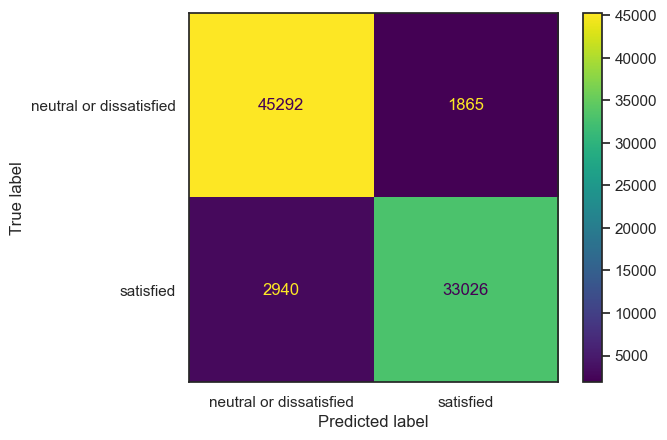

In [102]:
print("Resultados na base de Treino:")
# Calcular a acurácia
accuracy = accuracy_score(y_train, y_pred_train)
print(f'Acurácia: {accuracy:.3f}')

# Calcular a curva ROC e a AUC
fpr, tpr, _ = roc_curve(y_train, predictions_proba_train, pos_label='satisfied')
roc_auc = roc_auc_score(y_train, predictions_proba_train)
print(f'AUC: {roc_auc:.3f}')

# Exibir o relatório de classificação
print('Relatório de Classificação:')
print(classification_report(y_train, y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

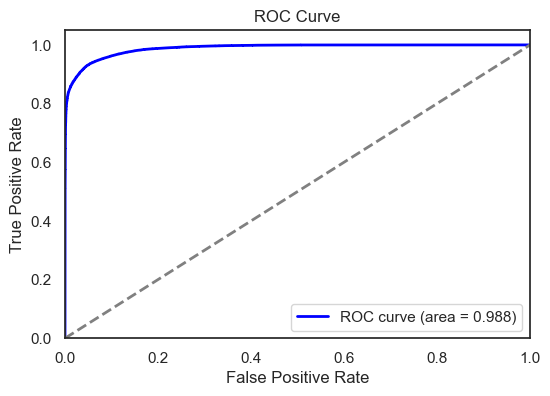

In [103]:
# Plotar a curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [63]:
# Conclusão

<div style="background-color: lightgray; padding: 10px;">
    <h3>  Avaliação na base de testes
</div>

Após o treinamento, o nosso modelo está pronto para fazer previsões sobre novos dados (base de testes).

Portanto, baseado nos parâmetros que nosso modelo se ajustou na **base de treinamento**, valos calcular uma previsão para a satisfação dos clientes (``y_pred``), utilizando os dados de entrada da **base de testes**:

In [104]:
# Fazer previsões no conjunto de teste
y_pred_test = pipeline.predict(X_test)
predictions_proba = pipeline.predict_proba(X_test)[:, 1]

Acurácia: 0.943
AUC: 0.988
Relatório de Classificação:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.96      0.95     11722
              satisfied       0.95      0.92      0.93      9059

               accuracy                           0.94     20781
              macro avg       0.94      0.94      0.94     20781
           weighted avg       0.94      0.94      0.94     20781



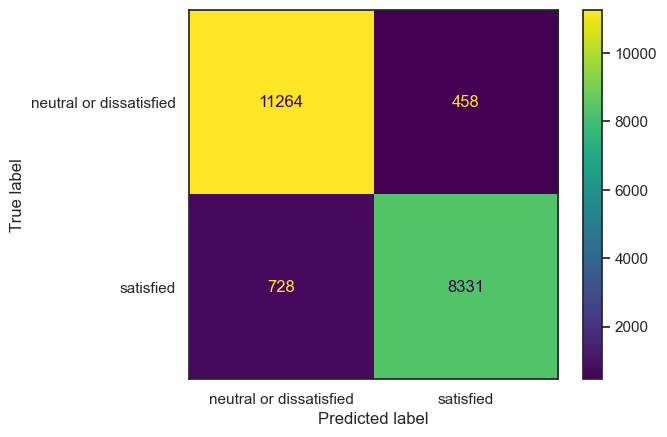

In [105]:
# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Acurácia: {accuracy:.3f}')

# Calcular a curva ROC e a AUC
fpr, tpr, _ = roc_curve(y_test, predictions_proba, pos_label='satisfied')
roc_auc = roc_auc_score(y_test, predictions_proba)
print(f'AUC: {roc_auc:.3f}')

# Exibir o relatório de classificação
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

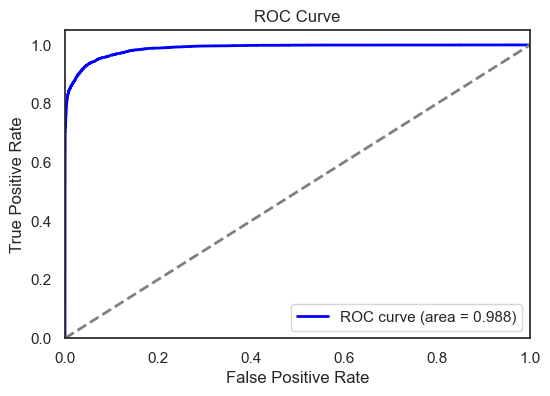

In [106]:
# Plotar a curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [63]:
# Conclusão

<div style="background-color: lightgray; padding: 10px;">
    <h3>  Feature Importance
</div>

<div style="background-color: lightgray; padding: 10px;">
    <h3>  Otimização de Hiperparâmetros
</div>

Com o objetivo de melhorar a performance de um modelo, podemos utilizar um processo de **otimização de hiperparâmetros**, sendo necessário realizar o treinamento do modelo diversas vezes. 

Desse modo, podemos realizar os testes e validar se o desempenho do nosso modelo obteve melhorias com base nos hiperparâmetros e valores definidos para eles:

<div style="background-color: lightgray; padding: 10px;">
    <h3>  Teste final otimizado
</div>

Agora podemos avançar para o teste com os parâmetros otimizados em nossa base de testes:

<div style="background-color: lightgreen; padding: 10px;">
    <h2>  Aplicação do algoritmo de Clustering (K-Means)
</div>

Para complementar a análise, aplicaremos a técnica de clusterização K-Means para segmentar os passageiros em grupos distintos com base em suas respostas. 

Esta abordagem nos permitirá identificar diferentes perfis de passageiros e suas características específicas, fornecendo insights adicionais para melhorar a satisfação do cliente.

<div style="background-color: lightgreen; padding: 10px;">
    <h2>  Conclusões Finais
</div>


Esperamos identificar os principais fatores que influenciam a satisfação dos passageiros e construir um modelo preditivo robusto para prever a satisfação com precisão. Além disso, a clusterização deverá revelar grupos distintos de passageiros que podem ser alvo de estratégias personalizadas para melhorar a experiência do cliente.

A análise dos dados da pesquisa de satisfação dos passageiros de companhias aéreas pode fornecer valiosos insights para a melhoria contínua dos serviços oferecidos. A aplicação de técnicas de machine learning e clusterização não só ajuda na previsão da satisfação dos passageiros, mas também na identificação de segmentos específicos de clientes e suas necessidades particulares.
